In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

from   sklearn.linear_model    import LogisticRegression

from   sklearn.svm             import SVC

from   sklearn.neighbors        import KNeighborsClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

In [2]:
mnist = load_digits()
print('type - ' , type(mnist) )
print('keys - ' , mnist.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
features , labels = mnist.data , mnist.target

In [4]:
features.shape , labels.shape

((1797, 64), (1797,))

In [5]:
features[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [6]:
labels[1]

1

In [7]:
features[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

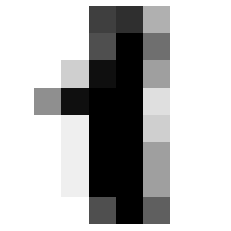

In [8]:
plt.imshow(features[1].reshape(8,8), cmap = matplotlib.cm.binary)


plt.axis('off')
plt.show()
plt.close()


In [9]:
X_train , X_test , y_train , y_test = train_test_split(features ,
                                                       labels ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [10]:
tree_model = DecisionTreeClassifier(criterion    = 'entropy' ,
                                    max_depth    = 8 ,
                                    max_features = 32 ,
                                    random_state = 35)
knn_model  = KNeighborsClassifier(n_neighbors = 299 )
svm_model  = SVC(probability = True )

In [11]:
def metrics_evaluation(target , prediction) :
    print('accuracy \n'    , accuracy_score(target , prediction))


In [12]:
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


In [13]:
metrics_evaluation(y_test , tree_pred)
metrics_evaluation(y_test , knn_pred)
metrics_evaluation(y_test , svm_pred)

accuracy 
 0.8694444444444445
accuracy 
 0.8555555555555555
accuracy 
 0.9916666666666667


In [18]:
print('VotingClassifier hardVoting - ')
print()

hard_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model)] ,
                                      weights    = [1,1,1] ,
                                      voting     = 'hard' )


VotingClassifier hardVoting - 



In [20]:
hard_voting_model.fit(X_train , y_train)
hard_voting_pred = hard_voting_model.predict(X_test)
metrics_evaluation(y_test , hard_voting_pred)

accuracy 
 0.9611111111111111


In [21]:
soft_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model)] ,
                                      weights    = [1,1,1] ,
                                      voting     = 'soft' )

soft_voting_model.fit(X_train , y_train)
soft_voting_pred = soft_voting_model.predict(X_test)
metrics_evaluation(y_test , soft_voting_pred)

accuracy 
 0.9361111111111111


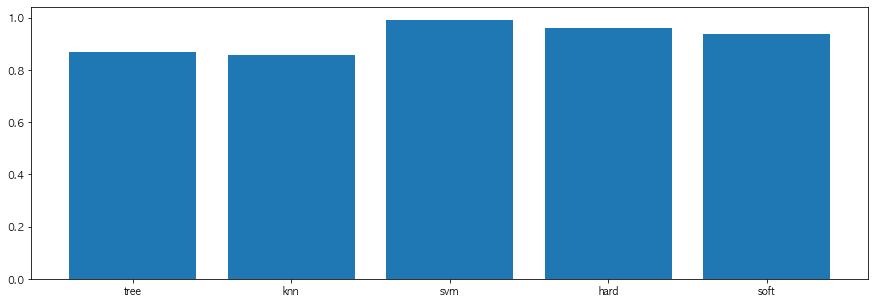

In [22]:
plt.figure( figsize = (15,5))

x = np.arange(5)

plt.bar(x , height = [
    accuracy_score(y_test , tree_pred) ,
    accuracy_score(y_test , knn_pred) ,
    accuracy_score(y_test , svm_pred) ,
    accuracy_score(y_test , hard_voting_pred) ,
    accuracy_score(y_test , soft_voting_pred) ,
])
plt.xticks(x , ['tree' , 'knn' , 'svm' , 'hard' , 'soft'])

plt.show()
plt.close()

In [2]:
print('데이터를 활용한 앙상블 [실습] - 시각화 ')

cancer = load_breast_cancer()
cancer.keys()

데이터를 활용한 앙상블 [실습] - 시각화 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
tree_model     = DecisionTreeClassifier()
knn_model      = KNeighborsClassifier()
svm_model      = SVC(probability = True )
logistic_model = LogisticRegression()


hard_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model) , ('logistic' , logistic_model)] ,
                                      weights    = [1,1,1,1] ,
                                      voting     = 'hard' )

soft_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model) , ('logistic' , logistic_model)] ,
                                      weights    = [1,1,1,1] ,
                                      voting     = 'soft' )



In [4]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data ,
                                                       cancer.target ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [5]:
estimators = [tree_model , knn_model , svm_model, hard_voting_model , soft_voting_model ]
for e in estimators :
    e.fit(X_train , y_train)
    pred = e.predict(X_test)
    print(e.__class__.__name__ , '\t' , accuracy_score(y_test , pred) )


DecisionTreeClassifier 	 0.956140350877193
KNeighborsClassifier 	 0.9473684210526315
SVC 	 0.9473684210526315
VotingClassifier 	 0.9649122807017544
VotingClassifier 	 0.9736842105263158


In [6]:
mnist = load_digits()
print('type - ' , type(mnist) )
print('keys - ' , mnist.keys())

features , labels = mnist.data , mnist.target

print('shape - ' , features.shape , labels.shape)

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
shape -  (1797, 64) (1797,)


In [7]:
def user_cross_val(e , features , labels ) :
    cv_scores = []

    for idx in range(10) :
        score = cross_val_score(e , features , labels , cv = 10 , scoring = 'accuracy')
        # print(score)
        cv_scores.append( score.mean() )

    return cv_scores

In [8]:
tree_cv_scores    =  user_cross_val(DecisionTreeClassifier() , features , labels)
print('*' * 50)
bagging_cv_scores =  user_cross_val(RandomForestClassifier() , features , labels)



**************************************************


In [14]:
print('tree score - ')
print(tree_cv_scores)
print()
print('tree score mean - ')
print(np.mean(tree_cv_scores))
print()
print('bagging - ')
print('bagging score - ')
print(bagging_cv_scores)
print()
print('bagging score mean - ')
print(np.mean(bagging_cv_scores))

tree score - 


NameError: name 'tree_cv_scores' is not defined

In [10]:
tree_bagging_frm = pd.DataFrame({
    'tree'    : tree_cv_scores ,
    'bagging' : bagging_cv_scores
})
tree_bagging_frm

,tree,bagging
0,0.824652,0.953808
1,0.824112,0.949907
2,0.825245,0.944894
3,0.824112,0.948243
4,0.823579,0.949907
5,0.829702,0.947132
6,0.821927,0.946574
7,0.828597,0.948234
8,0.821353,0.953802
9,0.827455,0.953793


In [15]:
feature_names = pd.read_csv('/Users/choijaewoo/ml-data/human_activity/features.txt' ,
                            header = None ,
                            names  = ['feature_name'])
feature_names

,feature_name
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


In [16]:
X_train = pd.read_csv('/Users/choijaewoo/ml-data/human_activity/Train/X_train.txt' ,
                      header = None ,
                      sep    = '\s+')
X_train.columns = feature_names.loc[ :  , 'feature_name']
X_train

feature_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [17]:
y_train = pd.read_csv('/Users/choijaewoo/ml-data/human_activity/Train/y_train.txt' ,
                      header = None ,
                      sep    = '\s+' ,
                      names  = ['target'])
y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2
